In [1]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.62808367 0.34972142 0.27903651 ... 0.68520929 0.34854281 0.56992143]
 [0.16343569 0.09100214 0.07260899 ... 0.17830053 0.09069545 0.1483011 ]
 [0.3722235  0.20725667 0.16536641 ... 0.40607806 0.20655819 0.3377546 ]
 ...
 [0.16467092 0.09168993 0.07315777 ... 0.17964811 0.09138092 0.14942195]
 [0.16075972 0.08951215 0.07142015 ... 0.17538118 0.08921048 0.14587294]
 [0.39952863 0.22246036 0.17749717 ... 0.43586666 0.22171064 0.3625312 ]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.59813973  0.32776965  0.16515406 ...  0.68417175  0.47121406
   0.52875619]
 [ 0.14529122  0.14667562  0.0060862  ...  0.298772    0.2706395
   0.22564648]
 [ 0.56484929  0.07768961  0.16769274 ...  0.21739745  0.07537497
   0.43358452]
 ...
 [ 0.21112278  0.02725699 -0.03070824 ...  0.28815074  0.06317302
   0.20692655]
 [ 0.05762408 -0.05429037  0.08853119 ...  0.20791667  0.04903416
   0.0361172 ]
 [ 0.39918349  0.21141052  0.19170934 ...  0.44753385  0.19784627
   0.469

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [4]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix)
K=5

[IterativeSVD] Iter 1: observed MAE=0.079545
[IterativeSVD] Iter 2: observed MAE=0.075721
[IterativeSVD] Iter 3: observed MAE=0.069728
[IterativeSVD] Iter 4: observed MAE=0.057458
[IterativeSVD] Iter 5: observed MAE=0.052252
[IterativeSVD] Iter 6: observed MAE=0.052238
[IterativeSVD] Iter 7: observed MAE=0.052232
[IterativeSVD] Iter 8: observed MAE=0.052229
[IterativeSVD] Iter 9: observed MAE=0.052227
[IterativeSVD] Iter 10: observed MAE=0.052226
[IterativeSVD] Iter 11: observed MAE=0.052226
[IterativeSVD] Iter 12: observed MAE=0.052225
[IterativeSVD] Iter 13: observed MAE=0.052225
[IterativeSVD] Iter 14: observed MAE=0.052225
[IterativeSVD] Iter 15: observed MAE=0.052225


In [17]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[-0.22955369  0.05768769  0.0382374  -0.03394412  0.09247411  0.00562157
 -0.01270869  0.1069134   0.48676031  0.13377877  0.05813771 -0.00916719
  0.23865978  0.03627474  0.12834512 -0.19345371  0.00247895  0.17393915
  0.35399037 -0.26193376 -0.06307417 -0.07192649 -0.45185244 -0.00766927
 -0.05024632 -0.10042915 -0.1606373  -0.16898095 -0.18111446  0.13051738
 -0.02647625 -0.03927208  0.2358248   0.05417995 -0.11787064 -0.12392929
  0.16661545 -0.0161205  -0.24250383 -0.22032309 -0.16782206  0.02460792
 -0.45486057  0.21050257  0.07940349 -0.01455724 -0.08440192 -0.0405285
  0.25016336 -0.00726766]
[-0.05207726 -0.330507    0.24701047 -0.14990425  0.00428848  0.05059365
 -0.01812944 -0.02855779 -0.00546412 -0.0385887   0.0923844   0.12099596
  0.15654904  0.04665252  0.28685538  0.33223924  0.15839312 -0.12840713
  0.12668417  0.01685643  0.04231814  0.2585554  -0.20404513 -0.04028066
  0.10662625  0.04665856 -0.04253516  0.20362173  0.13697825 -0.11061624
  0.02491032  0.10328571  

In [ ]:
 if self.K == 1:
            # When K=1, directly calculate outer product for first and second moments
            prod_square_firstmom = np.outer(self.L[:, 0] ** 2, self.F[:, 0] ** 2)
            prod_sectmom = np.outer(self.L2[:, 0], self.F2[:, 0])
        else:
            # When K>1, sum the outer products across all K components
            prod_square_firstmom = np.sum(
                [np.outer(self.L[:, k] ** 2, self.F[:, k].T ** 2) for k in range(self.K)], axis=0
            )
            prod_sectmom = np.sum(
                [np.outer(self.L2[:, k], self.F2[:, k]) for k in range(self.K)], axis=0
            )

        self.update_fitted_val()  # Update fitted values Y_fit

        # Compute R2 as per the formula
        R2 = (self.data- self.Y_fit) ** 2 - prod_square_firstmom + prod_sectmom

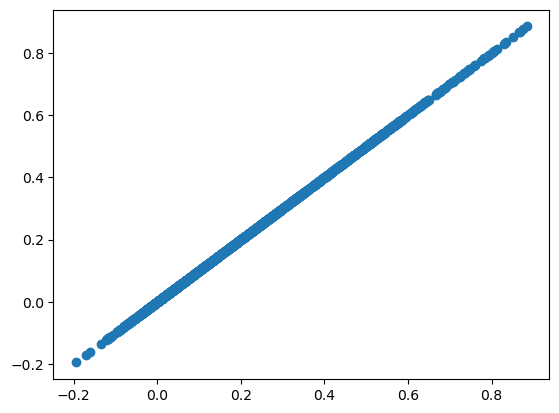

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

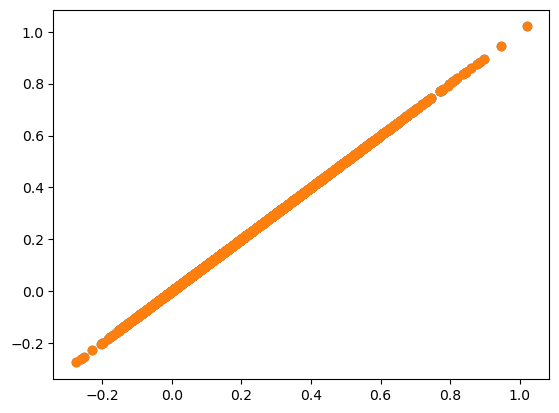

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [9]:
mycebmf.update_tau()
mycebmf.tau

array([[147.84407857, 147.84407857, 147.84407857, ..., 147.84407857,
        147.84407857, 147.84407857],
       [147.84407857, 147.84407857, 147.84407857, ..., 147.84407857,
        147.84407857, 147.84407857],
       [147.84407857, 147.84407857, 147.84407857, ..., 147.84407857,
        147.84407857, 147.84407857],
       ...,
       [147.84407857, 147.84407857, 147.84407857, ..., 147.84407857,
        147.84407857, 147.84407857],
       [147.84407857, 147.84407857, 147.84407857, ..., 147.84407857,
        147.84407857, 147.84407857],
       [147.84407857, 147.84407857, 147.84407857, ..., 147.84407857,
        147.84407857, 147.84407857]])

In [10]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm
norm
(50,)
(50,)
(50, 12)
(40, 12)


In [11]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.21883288, -0.16646035, -0.04821249, -0.15612275, -0.00505301,
        -0.07668446,  0.00233228, -0.16332876, -0.09883044, -0.13470533,
        -0.24661965, -0.20592122, -0.00447143, -0.16377495, -0.06829671,
        -0.18552999, -0.12282828, -0.22986987, -0.1607881 , -0.17216272,
        -0.01813327, -0.25796104, -0.00431028, -0.19441725, -0.1630839 ,
        -0.10473031, -0.02479162, -0.10935739, -0.12382814, -0.17605902,
        -0.19211707, -0.02523145, -0.09002067, -0.04383352, -0.25820336,
        -0.09231694, -0.23798068, -0.24271214, -0.17834551, -0.27261885]),
 array([0.00652778, 0.00652778, 0.00652778, 0.00652778, 0.00652778,
        0.00652778, 0.00652778, 0.00652778, 0.00652778, 0.00652778,
        0.00652778, 0.00652778, 0.00652778, 0.00652778, 0.00652778,
        0.00652778, 0.00652778, 0.00652778, 0.00652778, 0.00652778,
        0.00652778, 0.00652778, 0.00652778, 0.00652778, 0.00652778,
        0.00652778, 0.00652778, 0.00652778, 0.00652778, 0.00652778,
      

norm
(50,)
(50,)
(50, 12)
(40, 12)
norm
(50,)
(50,)
(50, 9)
(40, 9)
norm
(50,)
(50,)
(50, 9)
(40, 9)
norm
(50,)
(50,)
(50, 9)
(40, 9)
norm
(50,)
(50,)
(50, 9)
(40, 9)


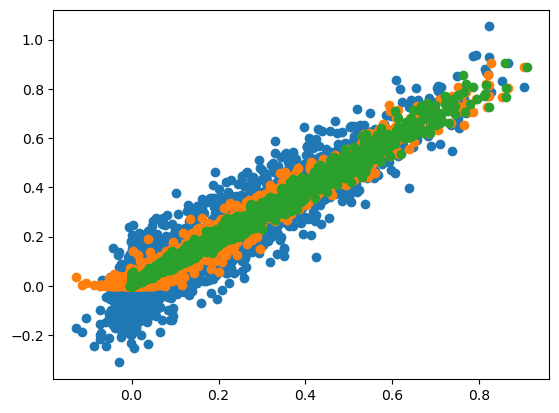

In [12]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


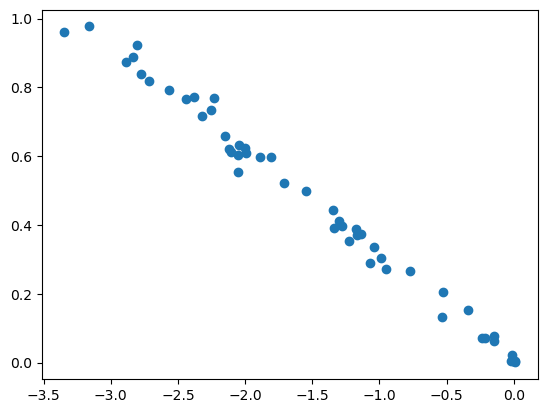

In [13]:
plt.scatter(mycebmf.L[:,0], u)

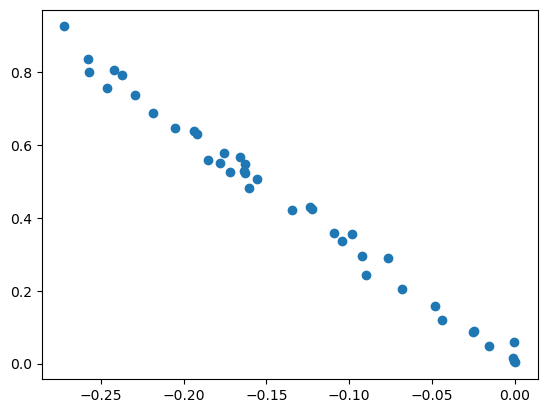

In [14]:
plt.scatter(mycebmf.F[:,0], v)

In [15]:
mycebmf.L[:,1]

array([-1.76756730e-01,  9.84785198e-03,  5.90229516e-03, -5.14451569e-03,
        2.06750935e-02,  8.01347459e-04, -1.82322056e-03,  2.74700840e-02,
        4.35571132e-01,  4.57188885e-02,  9.94915373e-03, -1.30803157e-03,
        1.90320967e-01,  5.55220026e-03,  4.13428874e-02, -1.19797980e-01,
        3.53063628e-04,  9.07728433e-02,  3.16356945e-01, -2.21803149e-01,
       -1.11406830e-02, -1.35259870e-02, -4.04309168e-01, -1.09334187e-03,
       -8.20836213e-03, -2.41919973e-02, -7.33392523e-02, -8.40055447e-02,
       -1.01007170e-01,  4.30491287e-02, -3.91388159e-03, -6.08081778e-03,
        1.86152421e-01,  9.05563249e-03, -3.39114466e-02, -3.80232982e-02,
        8.09146742e-02, -2.32311331e-03, -1.95780811e-01, -1.62493621e-01,
       -8.24594588e-02,  3.62365356e-03, -4.07014629e-01,  1.46952418e-01,
        1.58421283e-02, -2.09298031e-03, -1.75517258e-02, -6.31192555e-03,
        2.06483636e-01, -1.03692205e-03])